In [1]:
%%bash 
ls

ids_neg_real.list
ids_pos_real.list
Untitled.ipynb


In [9]:
%%bash
#shuffling the two files:
shuf ids_neg_real.list > shuf_neg.text
shuf ids_pos_real.list > shuf_pos.text


In [70]:
%%bash
#dividing negative dataset ids into 80% ids subset and 20% ids subset
python subsets.py shuf_neg.text training_negative.text benchmarking_negative.text

16721
15041
1680


In [71]:
%%bash
#dividing positive dataset ids into 80% ids subset and 20% ids subset
python subsets.py shuf_pos.text training_positive.text benchmarking_positive.text

1102
942
160


In [73]:
%%bash
#joining 80% negative ids subset with 80% positive  for training set
cat training_positive.text training_negative.text >> training_posneg.txt

In [27]:
%%bash
ls

benchmarking_neg.text
benchmarking_pos.text
benchmarking.txt
cluster_results_NEG_rep_seq.fasta
cluster_results_rep_seq.fasta
ids_neg_real.list
ids_pos_real.list
neg_pos.list
neg_pos_shuf.txt
shuf_neg.text
shuf_pos.text
steps8020.ipynb
subsets.py
training_neg.text
training_pos.text
training.txt


In [74]:
%%bash
#joining 20% negative ids subset with 20% positive for benchmarking set
cat benchmarking_positive.text benchmarking_negative.text >> benchmarking_posneg.txt

In [75]:
%%bash
wc training_posneg.txt

 15983  15983 112825 training_posneg.txt


In [76]:
%%bash
wc benchmarking_posneg.txt

 1840  1840 12948 benchmarking_posneg.txt


In [19]:
#visualization of data: The distribution of protein lengths in the negative benchmarking set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('benchmark_neg.tsv', sep='\t')
df
protein_length=[]
for i in df['Length']:
    protein_length.append(i)

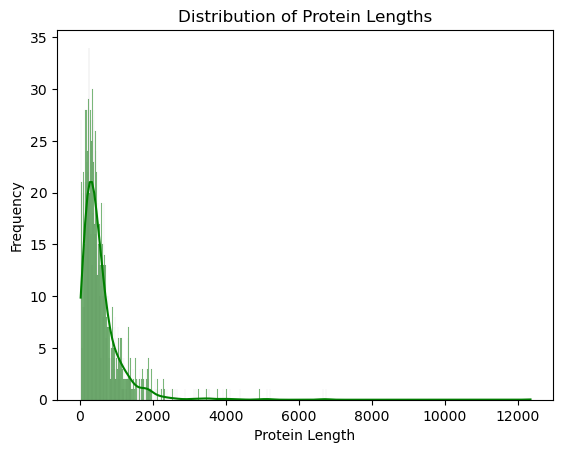

In [20]:
# Creating a histogram
sns.histplot(protein_length, bins=[i for i in range(0,max(protein_length),10)], kde=True, color='green')

# Adding labels and a title
plt.xlabel('Protein Length')
plt.ylabel('Frequency')
plt.title('Distribution of Protein Lengths')

# Show the plot
plt.show()


In [142]:
df2

,From,Entry,Reviewed,Entry Name,Length,Signal peptide
0,Q27082,Q27082,reviewed,CFGA_TACTR,673,"SIGNAL 1..19; /evidence=""ECO:0000269|PubMed:82..."
1,P54900,P54900,reviewed,SCN2B_RAT,215,"SIGNAL 1..29; /evidence=""ECO:0000269|PubMed:85..."
2,O96910,O96910,reviewed,ATT_APLCA,76,"SIGNAL 1..18; /evidence=""ECO:0000269|PubMed:96..."
3,P28335,P28335,reviewed,5HT2C_HUMAN,458,"SIGNAL 1..32; /evidence=""ECO:0000269|PubMed:22..."
4,Q96PL1,Q96PL1,reviewed,SG3A2_HUMAN,93,"SIGNAL 1..21; /evidence=""ECO:0000269|PubMed:12..."
...,...,...,...,...,...,...
155,P0DPU1,P0DPU1,reviewed,VA576_SCODE,210,"SIGNAL 1..23; /evidence=""ECO:0000269|PubMed:23..."
156,Q8NC67,Q8NC67,reviewed,NETO2_HUMAN,525,"SIGNAL 1..22; /evidence=""ECO:0000269|PubMed:15..."
157,P04706,P04706,reviewed,GLU2_MAIZE,223,"SIGNAL 1..19; /evidence=""ECO:0000269|Ref.6"""
158,P06911,P06911,reviewed,LCN5_RAT,188,"SIGNAL 1..19; /evidence=""ECO:0000269|PubMed:21..."


In [21]:
#visualization of data: The distribution of protein lengths in the positive benchmarking set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df2 = pd.read_csv('benchmark_pos.tsv', sep='\t')
df2
protein_length2=[]
for i in df2['Length']:
    protein_length2.append(i)


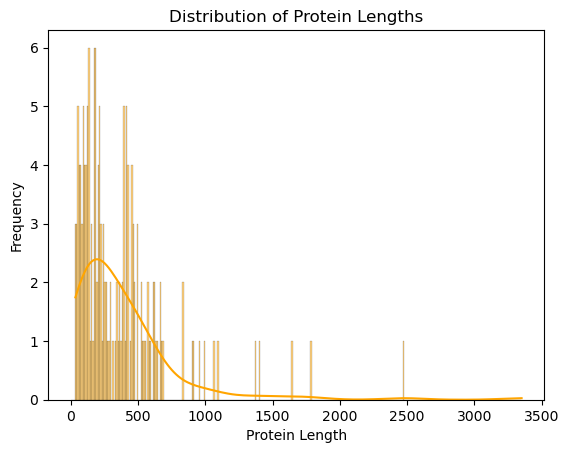

In [22]:
# Creating a histogram
sns.histplot(protein_length2, bins=[i for i in range(0,max(protein_length2),10)], kde=True, color='orange')

# Adding labels and a title
plt.xlabel('Protein Length')
plt.ylabel('Frequency')
plt.title('Distribution of Protein Lengths')

# Show the plot
plt.show()

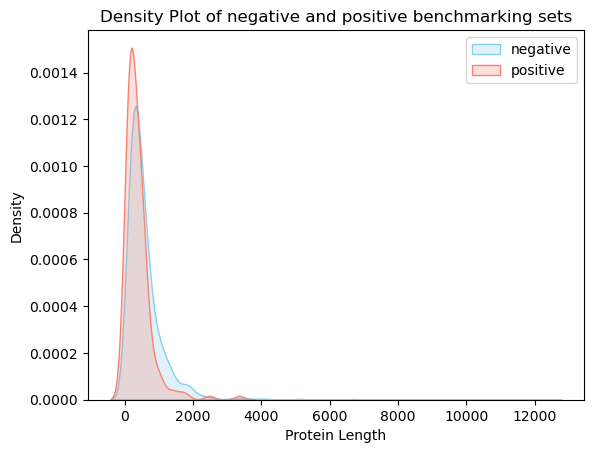

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a density plot with Seaborn
sns.kdeplot(protein_length, color='skyblue', fill=True, label='negative')
sns.kdeplot(protein_length2, color='salmon', fill=True, label='positive')

# Add labels and a legend
plt.xlabel('Protein Length')
plt.ylabel('Density')
plt.title('Density Plot of negative and positive benchmarking sets')
plt.legend()

# Show the plot
plt.show()

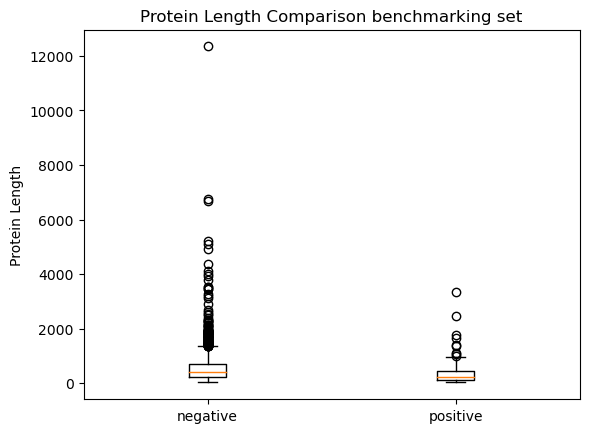

In [24]:
data = [protein_length, protein_length2]
plt.boxplot(data, labels=['negative', 'positive'])
plt.title('Protein Length Comparison benchmarking set')
plt.ylabel('Protein Length')
plt.show()


##TRAINING_SET##


In [25]:
#visualization of data: The distribution of protein lengths in the positive training set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df3 = pd.read_csv('training_positive.tsv', sep='\t')
df
protein_length_tp=[]
for i in df3['Length']:
    protein_length_tp.append(i)

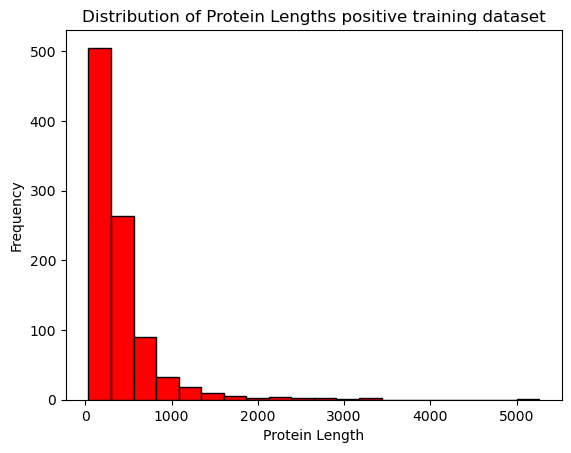

In [26]:
# Creating a histogram
plt.hist(protein_length_tp, bins = 20, color='red', edgecolor='black')

# Adding labels and a title
plt.xlabel('Protein Length')
plt.ylabel('Frequency')
plt.title('Distribution of Protein Lengths positive training dataset')

# Show the plot
plt.show()

In [27]:
#visualization of data: The distribution of protein lengths in the negative training set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df4 = pd.read_csv('training_negative.tsv', sep='\t')
df
protein_length_tn=[]
for i in df4['Length']:
    protein_length_tn.append(i)

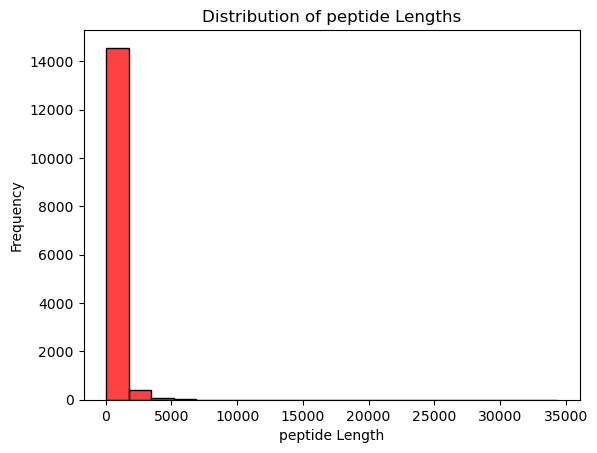

In [28]:
# Creating a histogram
#plt.hist(protein_length_tn, bins=[i for i in range(0,max(protein_length2),10)], color='red', edgecolor='black')

# Adding labels and a title
#plt.xlabel('Protein Length')
#plt.ylabel('Frequency')
#plt.title('Distribution of Protein Lengths negative training dataset')

# Show the plot
#plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Creating a histogram with Seaborn
sns.histplot(protein_length_tn, bins=20, color='red', edgecolor='black')

# Adding labels and a title
plt.xlabel('peptide Length')
plt.ylabel('Frequency')
plt.title('Distribution of peptide Lengths')

# Show the plot
plt.show()

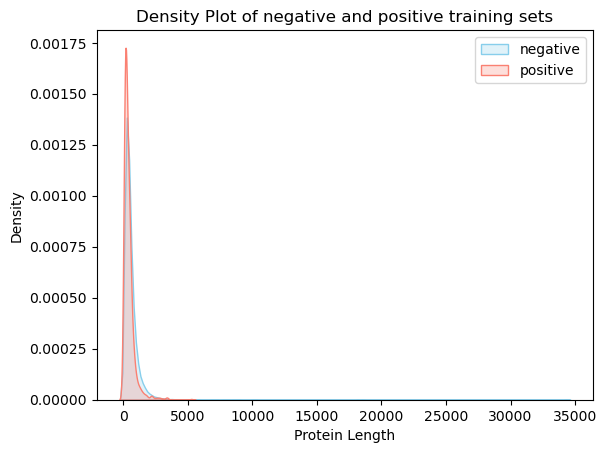

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a density plot with Seaborn
sns.kdeplot(protein_length_tn, color='skyblue', fill=True, label='negative')
sns.kdeplot(protein_length_tp, color='salmon', fill=True, label='positive')

# Add labels and a legend
plt.xlabel('Protein Length')
plt.ylabel('Density')
plt.title('Density Plot of negative and positive training sets')
plt.legend()

# Show the plot
plt.show()

In [167]:
# retrieving the length of peptides from positive benchmarking dataset
df2
signalp_length=[]
pept_l=[]
pept_l1=[]
#to_remove =[]
for i in df2['Signal peptide']:
    signalp_length.append(i)
for j in range(len(signalp_length)):
    if signalp_length[j][10] != ".":
        if signalp_length[j][10] != "?":
            pept_l.append(signalp_length[j][10])
            pept_l1.append(signalp_length[j][11])
for el in range(len(pept_l)):
   pept_l[el] = int(pept_l[el]+pept_l1[el])
#for k in range(len(pept_l)):
    #if pept_l[k] == '.':
    #    to_remove.append(k)
   # if pept_l[k] == "?":
    #    to_remove.append(k)
print(to_remove)

[11, 12, 18, 19, 31, 47, 69, 103]


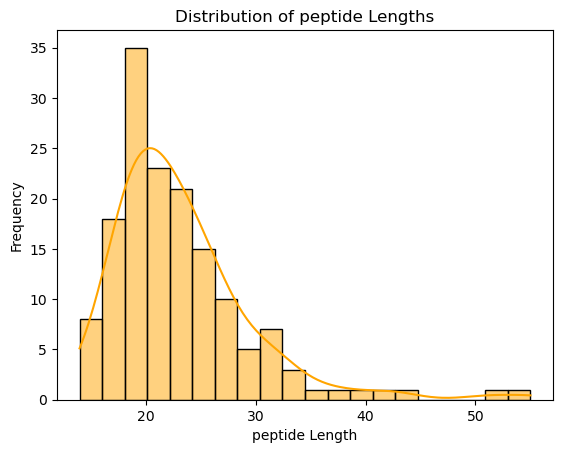

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Creating a histogram with Seaborn
sns.histplot(pept_l, bins=20, kde=True, color='orange')

# Adding labels and a title
plt.xlabel('peptide Length')
plt.ylabel('Frequency')
plt.title('Distribution of peptide Lengths')

# Show the plot
plt.show()


In [198]:
# retrieving the length of peptides from positive training dataset
df3
signalp_length=[]
pept_length=[]
pept_l1=[]
#to_remove2= []
for j in df3['Signal peptide']:
    signalp_length.append(j)
for l in range(len(signalp_length)):
    if signalp_length[l][10] != ".":
        if signalp_length[l][10] != "?":
            if signalp_length[l][11] != ";":
                pept_length.append(signalp_length[l][10])
                pept_l1.append(signalp_length[l][11])
for elem in range(len(pept_length)):
    pept_length[elem] = int(pept_length[elem]+pept_l1[elem])
#for k in range(len(pept_length)):
   # if pept_length[k] == '.':
    #    to_remove2.append(k)
   # if pept_length[k] == "?":
   #     to_remove2.append(k)
print(to_remove2)

[306, 366, 582, 583, 759, 762, 827, 925, 936]


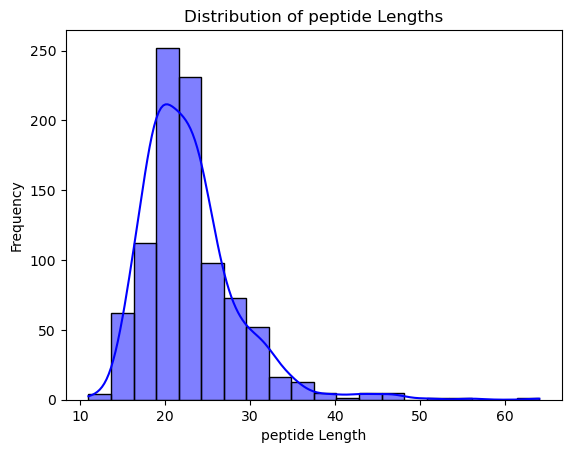

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Creating a histogram with Seaborn

sns.histplot(pept_length, bins=20, kde=True, color='blue')

# Adding labels and a title
plt.xlabel('peptide Length')
plt.ylabel('Frequency')
plt.title('Distribution of peptide Lengths')

# Show the plot
plt.show()

In [34]:
#myseries_pept_l = pd.Series(pept_l)
#myseries_pept_l2 = pd.Series(pept_l2)
#df_peptide = pd.concat([myseries_pept_l, myseries_pept_l2], axis=1, keys=['benchmarking', 'training'])
#df_peptide

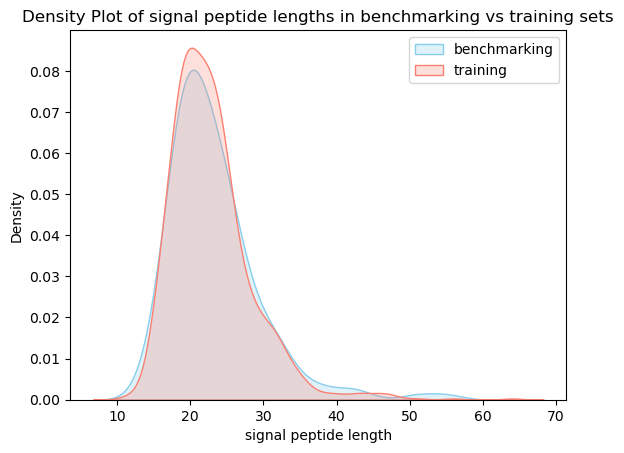

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a density plot with Seaborn
sns.kdeplot(pept_l, color='skyblue', fill=True, label='benchmarking')
sns.kdeplot(pept_length, color='salmon', fill=True, label='training')

# Adding labels and a legend
plt.xlabel('signal peptide length')
plt.ylabel('Density')
plt.title('Density Plot of signal peptide lengths in benchmarking vs training sets')
plt.legend()

# Showing the plot
plt.show()

In [36]:
df_tax = pd.read_csv('benchmarking_tax.tsv', sep='\t')
df_tax['Taxonomic lineage']= df_tax['Taxonomic lineage'].str.extract(r'( [^,]*) \(kingdom\)')

In [37]:
df_tax.head()

,From,Entry,Reviewed,Entry Name,Length,Signal peptide,Taxonomic lineage
0,Q27082,Q27082,reviewed,CFGA_TACTR,673,"SIGNAL 1..19; /evidence=""ECO:0000269|PubMed:82...",Metazoa
1,P54900,P54900,reviewed,SCN2B_RAT,215,"SIGNAL 1..29; /evidence=""ECO:0000269|PubMed:85...",Metazoa
2,O96910,O96910,reviewed,ATT_APLCA,76,"SIGNAL 1..18; /evidence=""ECO:0000269|PubMed:96...",Metazoa
3,P28335,P28335,reviewed,5HT2C_HUMAN,458,"SIGNAL 1..32; /evidence=""ECO:0000269|PubMed:22...",Metazoa
4,Q96PL1,Q96PL1,reviewed,SG3A2_HUMAN,93,"SIGNAL 1..21; /evidence=""ECO:0000269|PubMed:12...",Metazoa


In [38]:
df_tax['Taxonomic lineage'].fillna("other", inplace = True)

In [39]:
df_tax.groupby(['Taxonomic lineage']).count()

,From,Entry,Reviewed,Entry Name,Length,Signal peptide
Taxonomic lineage,,,,,,
Fungi,478,478,478,478,478,13
Metazoa,1010,1010,1010,1010,1010,132
Viridiplantae,294,294,294,294,294,15
other,58,58,58,58,58,0


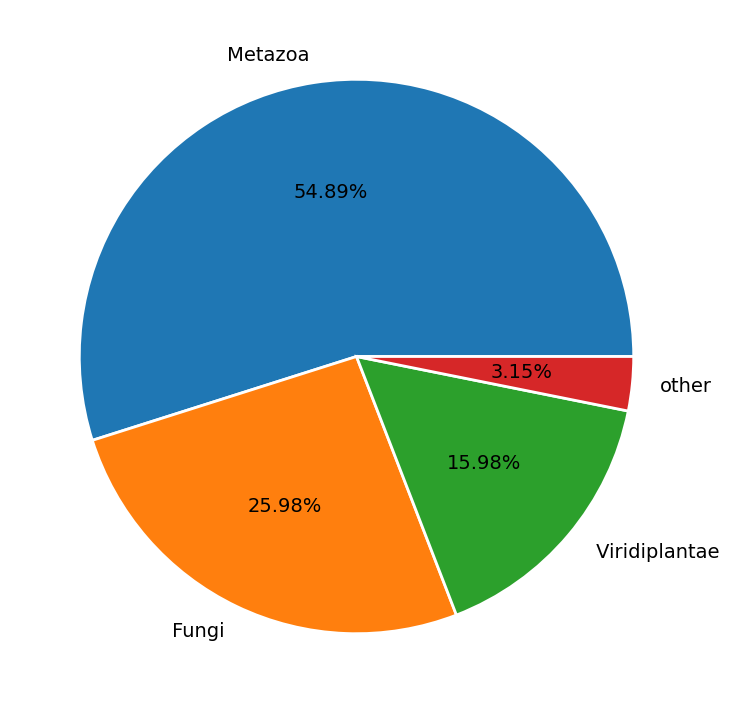

In [40]:
plt.figure(figsize = (9,9))
dbseries=df_tax['Taxonomic lineage'].value_counts()
dbvalues=list(dbseries.values)
dbindex=list(dbseries.index)
plt.pie(dbvalues, labels=dbindex,autopct='%.2f%%', wedgeprops={"edgecolor":"white",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True},
        textprops={'fontsize': 14})
plt.show()

In [41]:
###TRAINING DATAFRAME###

df_tax_tr = pd.read_csv('training_tax.tsv', sep='\t')
df_tax_tr['Taxonomic lineage']= df_tax_tr['Taxonomic lineage'].str.extract(r'( [^,]*) \(kingdom\)')

In [42]:
df_tax_tr['Taxonomic lineage'].fillna("other", inplace = True)

In [43]:
df_tax_tr.groupby(['Taxonomic lineage']).count()

,From,Entry,Reviewed,Entry Name,Length,Signal peptide
Taxonomic lineage,,,,,,
Fungi,4423,4423,4423,4423,4423,78
Metazoa,8349,8349,8349,8349,8349,744
Viridiplantae,2682,2682,2682,2682,2682,91
other,529,529,528,529,528,29


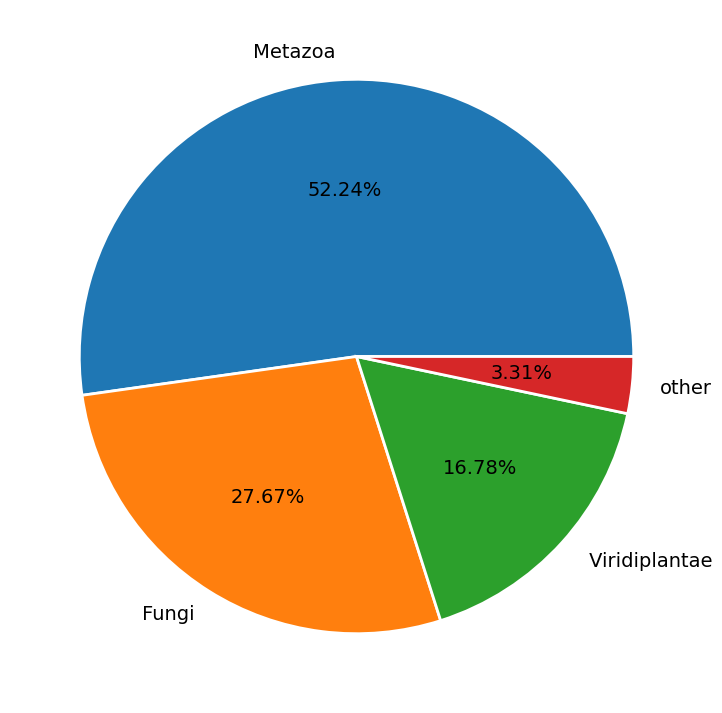

In [44]:
plt.figure(figsize = (9,9))
dbseries=df_tax_tr['Taxonomic lineage'].value_counts()
dbvalues=list(dbseries.values)
dbindex=list(dbseries.index)
plt.pie(dbvalues, labels=dbindex,autopct='%.2f%%', wedgeprops={"edgecolor":"white",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True},
        textprops={'fontsize': 14})
plt.show()

In [45]:

#Comparative amino-acid composition of SPs against some background distribution e.g.
#amino acid composition of SwissProt
#Display AA compositions of SP sequences and SwissProt using a combined
#barplot as shown before



In [265]:
# Initialize a dictionary to store amino acid frequencies
aa_frequency = {}
lst_compo = []
lst_freq = []
lst_aa = []

output_file = "sub_t_pept2.fasta"
with open(output_file, "r") as file:
    sequence = ""
    for line in file:
        if line.startswith(">"):
            # Process the previous sequence
            for aa in sequence:
                if aa in aa_frequency:
                    aa_frequency[aa] += 1
                else:
                    aa_frequency[aa] = 1
            sequence = ""
        else:
            # Concatenate the sequence lines
            sequence += line.strip()

# Process the last sequence in the file
for aa in sequence:
    if aa in aa_frequency:
        aa_frequency[aa] += 1
    else:
        aa_frequency[aa] = 1

# Print the amino acid frequencies
for aa, count in aa_frequency.items():
    lst_aa.append(aa)
    lst_compo.append(count)
for i in range(len(lst_compo)):
    lst_freq.append((lst_compo[i]/sum(lst_compo)*100))

In [266]:
myseries_lst_aa = pd.Series(lst_aa)
myseries_lst_frq= pd.Series(lst_freq)
df_compo = pd.concat([myseries_lst_aa, myseries_lst_frq], axis=1, keys=['aa','frequency'])
df_compo


,aa,frequency
0,M,6.229185
1,T,4.845443
2,L,21.164220
3,G,5.774192
4,A,13.246400
5,V,8.044467
6,Q,2.176462
7,P,4.268493
8,H,1.149210
9,S,7.223603


In [267]:


# Create a list of tuples where each tuple contains an amino acid and its corresponding frequency
aa_freq_list1 = list(zip(lst_aa, lst_freq))

# Sort the list of tuples based on the order of amino acids in lst_AA
sorted_aa_freq1 = sorted(aa_freq_list1, key=lambda x: lst_AA.index(x[0]))

# Extract the sorted amino acids and frequencies
sorted_aa_list1, sorted_freq_list1 = zip(*sorted_aa_freq1)

# Print the sorted lists
print("Sorted Amino Acids:", sorted_aa_list1)
print("Sorted Frequencies:", sorted_freq_list1)

Sorted Amino Acids: ('A', 'V', 'L', 'Q', 'P', 'H', 'S', 'G', 'K', 'E', 'R', 'T', 'I', 'D', 'M', 'N', 'W', 'F', 'Y', 'C', 'X')
Sorted Frequencies: (13.246399924949575, 8.044467376518599, 21.164219710117735, 2.1764623106149443, 4.26849289366293, 1.1492096252169426, 7.223603358506496, 5.7741920352737, 2.570477039260753, 1.7589943243116468, 3.320981284300389, 4.84544303203715, 4.6015291523992685, 1.2852385196303766, 6.229185233828979, 1.3133824288193632, 1.6839438998076832, 5.098738214738027, 1.228950701252404, 2.983254374032553, 0.032834560720484074)


In [268]:
df_compo.to_csv('aa_compo_TP.csv', index=False)




In [269]:
AA_compo_uniprot= {"A":8.25,"V":6.85,"L":9.65, "Q":3.93,"P":4.74,"H":2.27,"S":6.65,"G":7.07,"K":5.80,"E":6.72,"R":5.53,"T":5.36,"I":5.91,

   "D":5.46, "M":2.41, "N":4.06,  "W":1.10, "F":3.86,"Y":2.92, "C":1.38 , "X":0.00}



In [270]:
lst_AA =[]
lst_COMPO =[]
lst_FREQ = []
for i in AA_compo_uniprot.keys():
    lst_AA.append(i)
for j in AA_compo_uniprot:
    lst_FREQ.append(AA_compo_uniprot[j])


In [271]:
myseries_lst_AA = pd.Series(lst_AA)
myseries_lst_FREQ= pd.Series(lst_FREQ)
df_compo2 = pd.concat([myseries_lst_AA, myseries_lst_FREQ], axis=1, keys=['aa','frequency'])
df_compo2
df_compo2.to_csv('aa_compo_UNIPROT1.csv', index=False)
df_compo2

,aa,frequency
0,A,8.25
1,V,6.85
2,L,9.65
3,Q,3.93
4,P,4.74
5,H,2.27
6,S,6.65
7,G,7.07
8,K,5.80
9,E,6.72


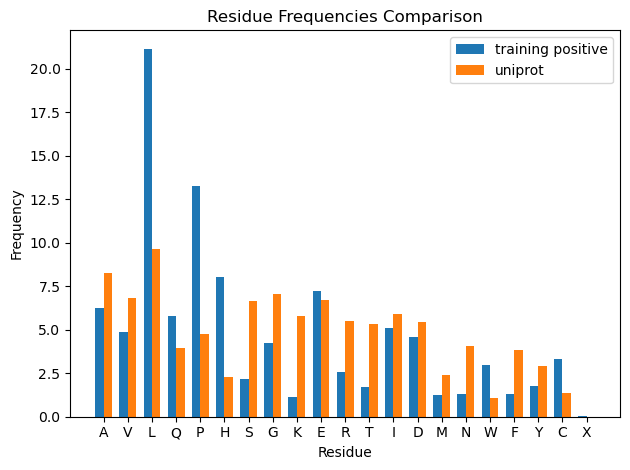

In [272]:
import matplotlib.pyplot as plt

# Create a bar width
bar_width = 0.35

# Calculate the x-axis positions for the bars
x_pos = range(len(lst_AA))

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create bars for the first set of frequencies
bars1 = ax.bar(x_pos, lst_freq, bar_width, label='training positive')

# Create bars for the second set of frequencies, shifted by the bar width
bars2 = ax.bar([x + bar_width for x in x_pos], lst_FREQ, bar_width, label='uniprot')

# Set labels and title
ax.set_xlabel('Residue')
ax.set_ylabel('Frequency')
ax.set_title('Residue Frequencies Comparison')
ax.set_xticks([x + bar_width / 2 for x in x_pos])
ax.set_xticklabels(lst_AA)
ax.legend()

# Display the histogram
plt.tight_layout()
plt.show()



In [273]:
# Initialize a dictionary to store amino acid frequencies
aa_frequency = {}
lst_compo2 = []
lst_freq2 = []
lst_aa = []
output_file2 = "sub_b_pept.fasta"

with open(output_file2, "r") as file:
    sequence = ""
    for line in file:
        if line.startswith(">"):
            # Process the previous sequence
            for aa in sequence:
                if aa in aa_frequency:
                    aa_frequency[aa] += 1
                else:
                    aa_frequency[aa] = 1
            sequence = ""
        else:
            # Concatenate the sequence lines
            sequence += line.strip()

# Process the last sequence in the file
for aa in sequence:
    if aa in aa_frequency:
        aa_frequency[aa] += 1
    else:
        aa_frequency[aa] = 1

# Print the amino acid frequencies
for aa, count in aa_frequency.items():
    lst_aa.append(aa)
    lst_compo2.append(count)
for i in range(len(lst_compo2)):
    lst_freq2.append((lst_compo2[i]/sum(lst_compo2)*100))


In [274]:


# Create a list of tuples where each tuple contains an amino acid and its corresponding frequency
aa_freq_list = list(zip(lst_aa, lst_freq2))

# Sort the list of tuples based on the order of amino acids in lst_AA
sorted_aa_freq = sorted(aa_freq_list, key=lambda x: lst_AA.index(x[0]))

# Extract the sorted amino acids and frequencies
sorted_aa_list, sorted_freq_list = zip(*sorted_aa_freq)

# Print the sorted lists
print("Sorted Amino Acids:", sorted_aa_list)
print("Sorted Frequencies:", sorted_freq_list)



Sorted Amino Acids: ('A', 'V', 'L', 'Q', 'P', 'H', 'S', 'G', 'K', 'E', 'R', 'T', 'I', 'D', 'M', 'N', 'W', 'F', 'Y', 'C', 'X')
Sorted Frequencies: (13.892045454545453, 8.380681818181818, 20.823863636363637, 1.875, 4.318181818181818, 0.9943181818181818, 8.011363636363637, 5.426136363636363, 2.414772727272727, 1.5625, 3.6079545454545454, 4.715909090909091, 4.886363636363637, 1.2215909090909092, 6.306818181818182, 1.1363636363636365, 1.5625, 4.9147727272727275, 1.278409090909091, 2.6420454545454546, 0.028409090909090908)


In [275]:
myseries_lst_aa = pd.Series(sorted_aa_list)
myseries_lst_frq2= pd.Series(sorted_freq_list)
df_compo2 = pd.concat([myseries_lst_aa, myseries_lst_frq2], axis=1, keys=['aa','frequency'])
df_compo2
df_compo2

,aa,frequency
0,A,13.892045
1,V,8.380682
2,L,20.823864
3,Q,1.875000
4,P,4.318182
5,H,0.994318
6,S,8.011364
7,G,5.426136
8,K,2.414773
9,E,1.562500


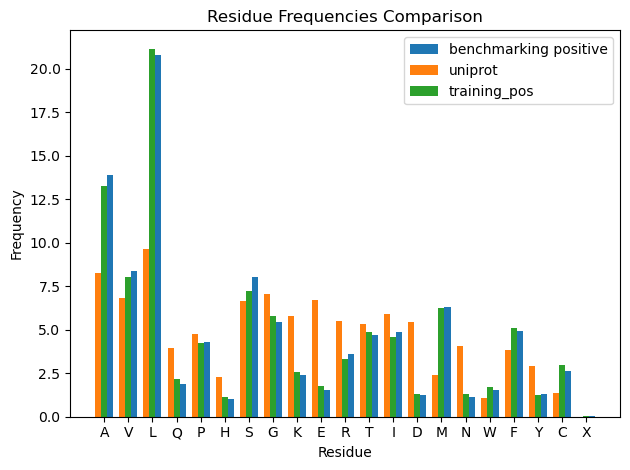

In [276]:
import matplotlib.pyplot as plt
import numpy as np

# Create a bar width
bar_width = 0.25  # Adjust the bar width as needed

# Calculate the x-axis positions for the bars
x_pos = np.arange(len(lst_AA))

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create bars for the first set of frequencies
bars1 = ax.bar(x_pos + bar_width, sorted_freq_list, bar_width, label='benchmarking positive')
# Create bars for the third set of frequencies
bars2 = ax.bar(x_pos - bar_width, lst_FREQ, bar_width, label='uniprot')
# Create bars for the second set of frequencies
bars3 = ax.bar(x_pos, sorted_freq_list1, bar_width, label='training_pos')


# Set labels and title
ax.set_xlabel('Residue')
ax.set_ylabel('Frequency')
ax.set_title('Residue Frequencies Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(lst_AA)
ax.legend()

# Display the histogram
plt.tight_layout()
plt.show()



In [277]:
##creating the seqeunce logo##



In [61]:
print(pept_l)

[19, 29, 18, 32, 21, 22, 19, 14, 18, 23, 42, 24, 25, 15, 22, 24, 18, 19, 28, 26, 25, 29, 17, 22, 24, 20, 20, 28, 21, 22, 55, 18, 33, 31, 34, 15, 51, 25, 17, 20, 23, 27, 17, 18, 20, 24, 16, 22, 19, 24, 17, 20, 16, 20, 16, 31, 23, 30, 17, 25, 19, 18, 17, 20, 24, 22, 15, 19, 31, 25, 19, 19, 26, 32, 37, 26, 25, 24, 23, 36, 20, 19, 29, 18, 27, 20, 28, 22, 22, 19, 16, 32, 43, 24, 26, 21, 17, 21, 18, 18, 23, 23, 23, 30, 21, 20, 19, 25, 20, 19, 20, 18, 21, 26, 39, 20, 22, 20, 27, 26, 27, 21, 27, 19, 19, 24, 18, 22, 22, 23, 27, 31, 27, 19, 33, 24, 19, 26, 22, 22, 26, 24, 21, 20, 22, 24, 19, 23, 22, 19, 19, 20]


In [62]:
df2

,From,Entry,Reviewed,Entry Name,Length,Signal peptide
0,Q27082,Q27082,reviewed,CFGA_TACTR,673,"SIGNAL 1..19; /evidence=""ECO:0000269|PubMed:82..."
1,P54900,P54900,reviewed,SCN2B_RAT,215,"SIGNAL 1..29; /evidence=""ECO:0000269|PubMed:85..."
2,O96910,O96910,reviewed,ATT_APLCA,76,"SIGNAL 1..18; /evidence=""ECO:0000269|PubMed:96..."
3,P28335,P28335,reviewed,5HT2C_HUMAN,458,"SIGNAL 1..32; /evidence=""ECO:0000269|PubMed:22..."
4,Q96PL1,Q96PL1,reviewed,SG3A2_HUMAN,93,"SIGNAL 1..21; /evidence=""ECO:0000269|PubMed:12..."
...,...,...,...,...,...,...
155,P0DPU1,P0DPU1,reviewed,VA576_SCODE,210,"SIGNAL 1..23; /evidence=""ECO:0000269|PubMed:23..."
156,Q8NC67,Q8NC67,reviewed,NETO2_HUMAN,525,"SIGNAL 1..22; /evidence=""ECO:0000269|PubMed:15..."
157,P04706,P04706,reviewed,GLU2_MAIZE,223,"SIGNAL 1..19; /evidence=""ECO:0000269|Ref.6"""
158,P06911,P06911,reviewed,LCN5_RAT,188,"SIGNAL 1..19; /evidence=""ECO:0000269|PubMed:21..."


In [184]:
file_bench =open("benchmarking_pos.fasta","r")
file_subseqs = open("sub_b.fasta","w")
seq = ""
lst_new2 =[]
lst_seqs =[]
lst_sequences = []
lst_new = []
new_seq =[]
for line in file_bench:
    line = line.strip()
    seq += line
lst_seqs.append(seq.split(">"))

lst_seqs[0].pop(0)
 #if not line.startswith(">"):    
       
for i in lst_seqs[0]:
    if i.startswith("sp"):
        lst_sequences.append(i)
for j in lst_sequences:
    lst_new.append(j.split("SV="))
for lst in range(len(lst_new)):
    for k in lst_new[lst]:
        lst_new2.append(k)
for element in lst_new2:
    if "sp" in element:
        lst_new2.remove(element)
sequences_aa = [s[1:] for s in lst_new2]
for inde in range(len(sequences_aa)):
    for q in range(len(to_remove)):
        if inde == to_remove[q]:
            sequences_aa.remove(sequences_aa[inde])
#print(sequences_aa)
for index in range(len(pept_l)):
    new_seq.append(sequences_aa[index][pept_l[index]-13:pept_l[index]+2])
for subseq in range(len(new_seq)):
    file_subseqs.write(new_seq[subseq] + "\n")
print(new_seq)


['CVVLHVGVARICCSH', 'LSLFFSLVPSGRSME', 'IILSLALVAAVFADQ', 'VWQSDISVSPVAAIV', 'LVTISLCSYSATAFL', 'PLLLVLHWKHGAGSP', 'ALILALMLSMTGADS', 'LLLLLLLLPLCWAVE', 'RLLLLLLLVFPATVL', 'LIPAMAFLSCVRPES', 'PLLLCALLAPGGAYV', 'SFHAVFSFTPLHTQH', 'FLMLGMIVEEGIAYV', 'FAVLLALFGLALAAR', 'VVFFAMVLASSQANE', 'ILLLSTTVPEVHSKS', 'GVQRALPNAPDGYVP', 'ILENQASGRRLRGSA', 'LVYAEDASSDSTGAD', 'VVVASLASSGVQGRS', 'LVVLMLSAKVGSGAL', 'ELLVGIYPSGVIGLV', 'IMIVTALILLAAAEP', 'LFLGFMLTSLSTARF', 'LLLSLALVAPGLSAR', 'LTLALVAVAGARAEV', 'AGLLGVFLTPALADY', 'GPNPDADPEAINLKA', 'VPSHWMVALLLLLSA', 'LALLLLCSYTCGSQD', '', 'AFLFLLGVLGALTEM', 'ALLLFYFSETSLGAP', 'FLVCAFWIPDSRGMP', 'SLLLAAGLMHSDAGT', 'LFVLAAIIAAVSSDR', 'VYRRDVTDEASAAAS', 'VMLAICFLARSDGKS', 'LLGTLCLLAVALAAE', 'AIITALCAMQVICED', 'WGGLLPFGMLCASST', 'LVVLAVLSDPVSAGY', 'IRMGPQERWLLRTKR', 'LIFLSFVALSSAGFV', 'VASALAATTLAAYAP', 'ALAVSSVFAAGPTAV', 'SATTLTAASLIGYST', 'LVALSATAAQARPVV', 'FLMFIAFVIIAEAQL', 'FVLGLVVIPPTLAQD', 'EILTVALVTGATAYN', 'FIIILIISGELYAEE', 'ILLLALAVSLACADS', 'SCIALS

In [187]:
file_bench =open("benchmarking_pos.fasta","r")
file_subseqs = open("sub_b_pept.fasta","w")
seq = ""
lst_new2 =[]
lst_seqs =[]
lst_sequences = []
lst_new = []
new_seq =[]
for line in file_bench:
    line = line.strip()
    seq += line
lst_seqs.append(seq.split(">"))

lst_seqs[0].pop(0)
 #if not line.startswith(">"):    
       
for i in lst_seqs[0]:
    if i.startswith("sp"):
        lst_sequences.append(i)
for j in lst_sequences:
    lst_new.append(j.split("SV="))
for lst in range(len(lst_new)):
    for k in lst_new[lst]:
        lst_new2.append(k)
for element in lst_new2:
    if "sp" in element:
        lst_new2.remove(element)
sequences_aa = [s[1:] for s in lst_new2]
for inde in range(len(sequences_aa)):
    for q in range(len(to_remove)):
        if inde == to_remove[q]:
            sequences_aa.remove(sequences_aa[inde])
#print(sequences_aa)
for index in range(len(pept_l)):
    new_seq.append(sequences_aa[index][0:pept_l[index]])
for subseq in range(len(new_seq)):
    file_subseqs.write(new_seq[subseq] + "\n")
print(new_seq)

['MLVLLCCVVLHVGVARICC', 'MHRDAWLPRPAFSLTGLSLFFSLVPSGRS', 'MKVAIIILSLALVAAVFA', 'MVNLRNAVHSFLVHLIGLLVWQSDISVSPVAA', 'MKLVTIFLLVTISLCSYSATA', 'MKVLAAGVVPLLLVLHWKHGAG', 'MKFFVFALILALMLSMTGA', 'MLLLLLLLLPLCWA', 'MRLLPRLLLLLLLVFPAT', 'MMSASRLAGTLIPAMAFLSCVRP', 'MAEWLLSASWQRRAKAMTAAAGSAGRAAVPLLLCALLAPGGA', 'KFALFSVLTLLSFHAVFSFTPLHT', 'MGTSYRKLGYVLFLMLGMIVEEGIA', 'MRFAVLLALFGLALA', 'MAATLPVFAVVFFAMVLASSQA', 'MVQYRALVIAVILLLSTTVPEVHS', 'DITFAGVQRALPNAPDGY', 'HLALLLILENQASGRRLRG', 'MKFTTLLFLAAVAGALVYAEDASSDSTG', 'MVSFRTMWSVVVVVVVASLASSGVQG', 'MGPQAAAGRMILLVVLMLSAKVGSG', 'MGLSTVPDLLLPLVLLELLVGIYPSGVIG', 'MLRLIMIVTALILLAAA', 'MKCWRLSAILFLGFMLTSLSTA', 'MVHATSPLLLLLLLSLALVAPGLS', 'MFLKAVVLTLALVAVAGARA', 'MKFTIAFAGLLGVFLTPALA', 'MSAEALADPKADPLAGPNPDADPEAINL', 'MARLALSPVPSHWMVALLLLL', 'MEKPELWGVLALLLLCSYTCGS', 'MKKTFLPIFLVILLASYALGNPQITFSKDWRPGKK', 'MRHLGAFLFLLGVLGALT', 'MIVLSVGSASSSPIVVVFSVALLLFYFSETSLG', 'MTAPWRRLRSLVWEYWAGFLVCAFWIPDSRG', 'MGDTWAQLPWPGPPHPAMLLISLLLAAGLMHSDA', 'MKLFVLAAIIAAVSS', 'MI

In [280]:
file_bench =open("training_positive.fasta","r")
file_subseqs = open("sub_t_pept3.fasta","w")
seq = ""
lst_new2 =[]
lst_seqs =[]
lst_sequences = []
lst_new = []
new_seq_t =[]
for line in file_bench:
    line = line.strip()
    seq += line
lst_seqs.append(seq.split(">"))

lst_seqs[0].pop(0)
 #if not line.startswith(">"):    
       
for i in lst_seqs[0]:
    if i.startswith("sp"):
        lst_sequences.append(i)
for j in lst_sequences:
    lst_new.append(j.split("SV="))
for lst in range(len(lst_new)):
    for k in lst_new[lst]:
        lst_new2.append(k)
for element in lst_new2:
    if "sp" in element:
        lst_new2.remove(element)
sequences_AA = [s[1:] for s in lst_new2]
for inde in range(len(sequences_aa)):
    for q in range(len(to_remove2)):
        if inde == to_remove2[q]:
          sequences_AA.remove(sequences_AA[inde])
#print(sequences_aa)
for index in range(len(pept_length)):
    new_seq_t.append(sequences_AA[index][0:pept_length[index]])
for subseq in range(len(new_seq_t)):
    file_subseqs.write(new_seq_t[subseq] + "\n")


In [282]:
new_seq2 =[]
file_training =open("training_positive.fasta","r")
file_subseqs = open("sub_t4.fasta","w")
for index in range(len(pept_length)):
    new_seq2.append(sequences_AA[index][pept_length[index]-13:pept_length[index]+2])
for subseq in range(len(new_seq2)):
    file_subseqs.write(new_seq2[subseq] + "\n")
print(new_seq2)


['AVLLVAQPQLVHSHP', 'SLGLYSQVSKLLACP', 'ALVLFTAVIGALADY', 'LIFILLQLPKLDSAP', 'VVCLLATMAVVSAHE', 'IFMILATTSSTFATL', 'LLLLLSLEAIVKAGI', 'FFAVALFATSALAAV', 'LFGAALCLTGSQALQ', 'FFADQENGGKALASP', 'LALILVLESSVQGYP', 'AVSNLLVWEKVTSLP', 'IVLLSTLAVMSSADV', 'CAFTTSYLPSAIADF', 'LALVLSLAQPASARR', 'KALILLLLGACQALQ', 'CVTTVLVTSATQGLS', 'RALLLCAAVVCGAAN', 'LALWLGAVGVGVAEL', 'ALLLALGVERALALP', 'CILLLNSCFLISSFN', 'YVWPLLLCSPCLLIQ', 'LLLLTLAADRASAKG', 'CLLLLGLALQGAASR', 'LLLLLLVPLIKPAPP', 'FLLALTIIASTWALT', 'LILLTWCVEGCSSQH', 'AVLCLSLPTGCLSSQ', 'VLAVFIKAVHVKAQE', 'LVLVSMLALGTLAEA', 'FLILFALVAVAAAGQ', 'SSAMAAPYSGNSNSD', 'LLILVSLAALAHAES', 'LVLLGYLSCKVTCES', 'LAAIAVTWVCGLKIG', 'LFVLMGLMAAASASS', 'LLLLLLLPSPLHPHP', 'LCIFAMMATLAMSRS', 'VSTLFLCFIVCISEQ', 'FFLLLSLIGFCWAQY', 'VLFAAASMTAVMAAE', 'LALTCAAAVWARPGE', 'VFALLGSACLVSANI', 'VIACLNLFQVVLTSR', 'VLVAVATALVSSSSP', 'IAIFVLMVEPGECGW', 'ALVVPQLLGFGHGAR', 'RWAIALLIAVGEAAV', 'DQPVPTPTPSVPTSS', 'CLSVASLVSYAGAAS', 'ALLGSLLLSGVLAAD', 'LFYLITCIFTCSASD', 'VLLLLLLSGD